# Plot loci under selection by annotation

In [1]:
%pylab inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/fig3d/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def main():
    
    print('Running main')
    
    p_val_thresh = 0.05 # Only loci with p value below this threshold are considered under selection
    s_val_thresh = 0.005 # Only loci with s value above this threshold are considered under selection
    
    # Results file
    inFile = "/storage/BonnieH/selection_project/per_locus/final_results/0.005_3_0.3_yny5_eurodem_pr2.txt"
    results_file = open(inFile, 'r')
    header = results_file.readline().strip()
    
    list_optimal = [8, 9, 10, 11] # Optimal alleles to graph 
    # Note: this plot only includes trinucleotides since all coding loci loci are trinucleotides
    
    # Lists for number of loci for each optimal allele with each annotation
    num_each_opt_coding = [0] * len(list_optimal)
    num_each_opt_intron = [0] * len(list_optimal)
    num_each_opt_UTR5 = [0] * len(list_optimal)
    num_each_opt_UTR3 = [0] * len(list_optimal)
    num_each_opt_promoter5kb = [0] * len(list_optimal)
    num_each_opt_intergenic = [0] * len(list_optimal)
    
    # Lists for number of loci for each optimal allele with each annotation that are under selection
    num_sig_coding = [0] * len(list_optimal)
    num_sig_intron = [0] * len(list_optimal)
    num_sig_UTR5 = [0] * len(list_optimal)
    num_sig_UTR3 = [0] * len(list_optimal)
    num_sig_promoter5kb = [0] * len(list_optimal)
    num_sig_intergenic = [0] * len(list_optimal)
    
    # Get number of loci under selection for each optimal allele
    results_file = open(inFile, 'r')
    header = results_file.readline().strip()
    for line in results_file:
        info = line.strip().split('\t')
        optimal_ru = int(info[4])
        period = int(info[3])
        s = info[16]
        
        if optimal_ru in list_optimal and s != 'N/A':
            s = float(info[16])
            
            # Get annotations
            coding = float(info[6])
            intron = float(info[7])
            UTR5 = float(info[8])
            UTR3 = float(info[9])
            promoter5kb = float(info[10])
            intergenic = float(info[11])
            index = list_optimal.index(optimal_ru)
            p_val = float(info[23])
            
            if coding == 1.0:
                num_each_opt_coding[index] += 1
                if s > s_val_thresh and p_val < p_val_thresh:
                    num_sig_coding[index] += 1
                    
            if intron == 1.0:
                num_each_opt_intron[index] += 1
                if s > s_val_thresh and p_val < p_val_thresh:
                    num_sig_intron[index] += 1
                    
            if UTR5 == 1.0:
                num_each_opt_UTR5[index] += 1
                if s > s_val_thresh and p_val < p_val_thresh:
                    num_sig_UTR5[index] += 1
                    
            if UTR3 == 1.0:
                num_each_opt_UTR3[index] += 1
                if s > s_val_thresh and p_val < p_val_thresh:
                    num_sig_UTR3[index] += 1
                    
            if promoter5kb == 1.0:
                num_each_opt_promoter5kb[index] += 1
                if s > s_val_thresh and p_val < p_val_thresh:
                    num_sig_promoter5kb[index] += 1
                    
            if intergenic == 1.0:
                num_each_opt_intergenic[index] += 1
                if s > s_val_thresh and p_val < p_val_thresh:
                    num_sig_intergenic[index] += 1
            
    results_file.close()
    
    # Get percent of loci that are under selection for each optimal repeat unit and annotation
    percent_sig_coding = [0] * len(list_optimal)
    percent_sig_intron = [0] * len(list_optimal)
    percent_sig_UTR5 = [0] * len(list_optimal)
    percent_sig_UTR3 = [0] * len(list_optimal)
    percent_sig_promoter5kb = [0] * len(list_optimal)
    percent_sig_intergenic = [0] * len(list_optimal)
    
    for i in range(0, len(list_optimal)):
        percent_sig_coding[i] = num_sig_coding[i]/num_each_opt_coding[i]
        percent_sig_intron[i] = num_sig_intron[i]/num_each_opt_intron[i]
        percent_sig_UTR5[i] = num_sig_UTR5[i]/num_each_opt_UTR5[i]
        percent_sig_UTR3[i] = num_sig_UTR3[i]/num_each_opt_UTR3[i]
        percent_sig_promoter5kb[i] = num_sig_promoter5kb[i]/num_each_opt_promoter5kb[i]
        percent_sig_intergenic[i] = num_sig_intergenic[i]/num_each_opt_intergenic[i]
    
    barWidth = 0.13
    r1 = np.arange(len(list_optimal))
    r2 = [x - barWidth for x in r1]
    r3 = [x - 2*barWidth for x in r1]
    r4 = [x + barWidth for x in r1]
    r5 = [x + 2*barWidth for x in r1]
    r6 = [x + 3*barWidth for x in r1]
    
    # Make the plot
    plt.bar(r3, percent_sig_coding, color='red', width=barWidth, edgecolor='white', label='coding')
    plt.bar(r2, percent_sig_intron, color='orange', width=barWidth, edgecolor='white', label='intron')
    plt.bar(r1, percent_sig_UTR5, color='yellow', width=barWidth, edgecolor='white', label='UTR5')
    plt.bar(r4, percent_sig_UTR3, color='green', width=barWidth, edgecolor='white', label='UTR3')
    plt.bar(r5, percent_sig_promoter5kb, color='blue', width=barWidth, edgecolor='white', label='promoter5kb')
    plt.bar(r6, percent_sig_intergenic, color='purple', width=barWidth, edgecolor='white', label='intergenic')
   
    plt.xlabel('Optimal Allele Repeat Units', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(list_optimal))], list_optimal)
    plt.ylabel('Fraction of loci', fontweight='bold')
    plt.title("Loci under selection by optimal allele length", fontweight='bold') 
    plt.legend()
    plt.savefig('/storage/BonnieH/selection_project/figures/figures/fig3d/fig3d.pdf',bbox_inches='tight')

Running main
CPU times: user 799 ms, sys: 32.4 ms, total: 831 ms
Wall time: 1.44 s


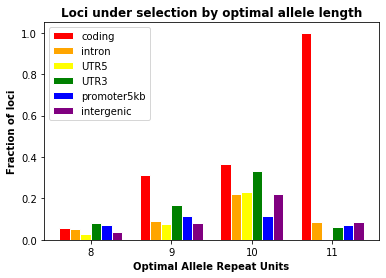

In [3]:
%%time
if __name__ == '__main__':
    main()